In [1]:
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
 
%matplotlib inline

In [2]:
DATA_PATH="datasets/Training.csv"
data=pd.read_csv(DATA_PATH).dropna(axis=1)

In [3]:
disease_counts=data["prognosis"].value_counts()
temp_df=pd.DataFrame({
    "Disease": disease_counts.index,
    "Counts": disease_counts.values
})

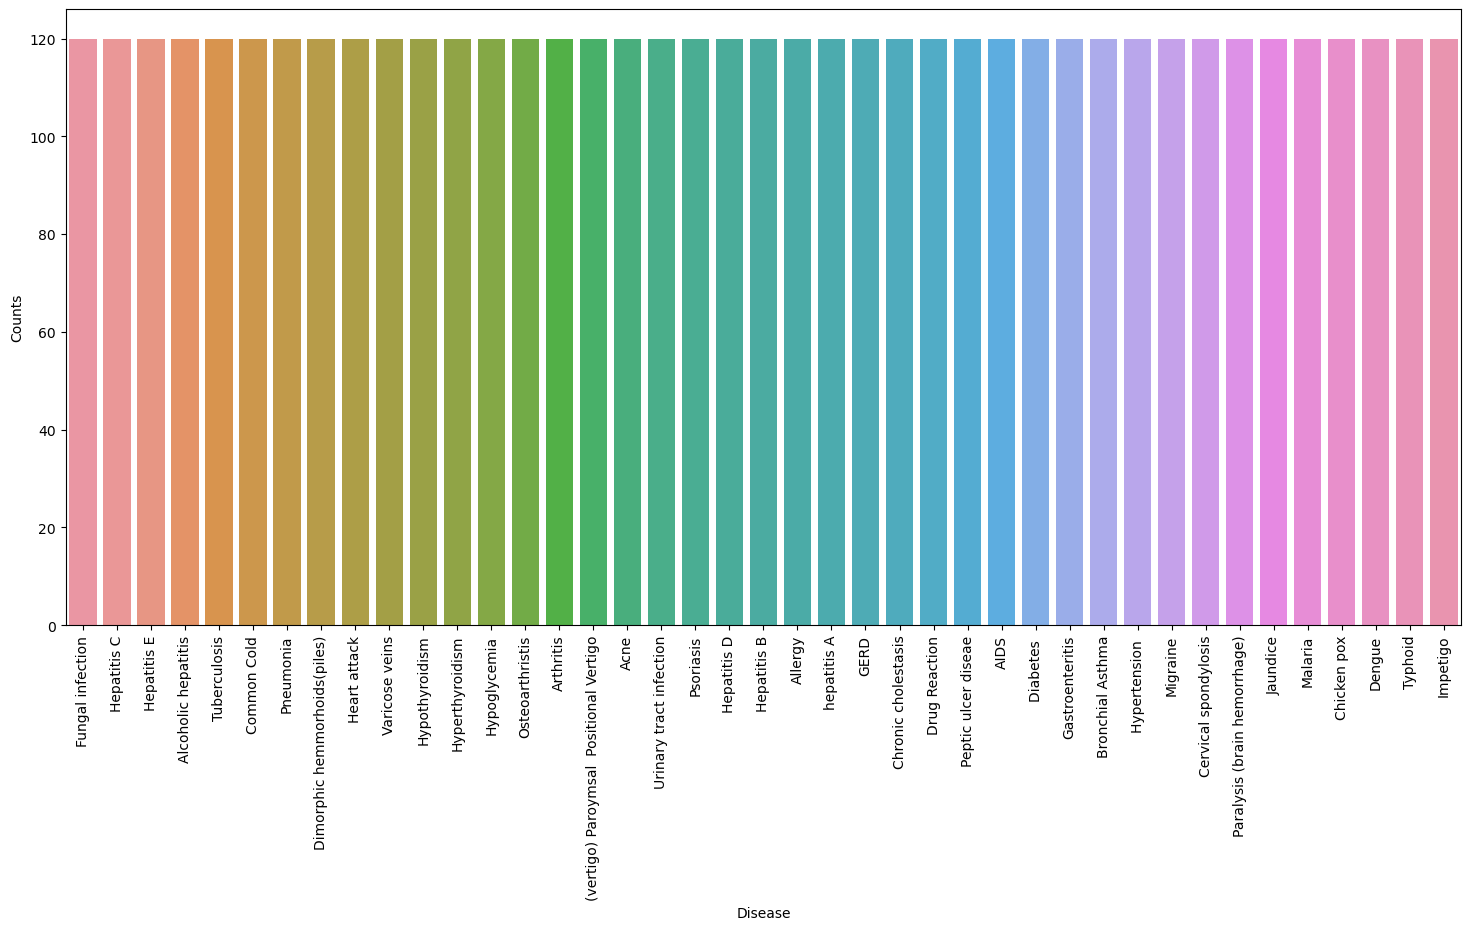

In [4]:
plt.figure(figsize=(18,8))
sns.barplot(x="Disease",y="Counts",data=temp_df)
plt.xticks(rotation=90)
plt.show()

In [5]:
encoder=LabelEncoder()
data['prognosis']=encoder.fit_transform(data['prognosis'])

In [17]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=24)
print(f"Train: {x_train.shape}, {y_train.shape}")
print(f"Test: {x_test.shape}, {y_test.shape}")

Train: (2460, 132), (2460,)
Test: (2460, 132), (2460,)


In [18]:
def cv_scoring(estimator,x,y):
    return accuracy_score(y,estimator.predict(x))

models={
    "SVC": SVC(),
    "Gaussian NB": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=24)
}

for model_name in models:
    model=models[model_name]
    scores=cross_val_score(model,x,y,cv=10,n_jobs=-1,scoring=cv_scoring)
    print("=="*30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Random Forest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


Accuracy on train data by SVM Classifier: 100.0
Accuracy on test data by SVM Classifier: 100.0


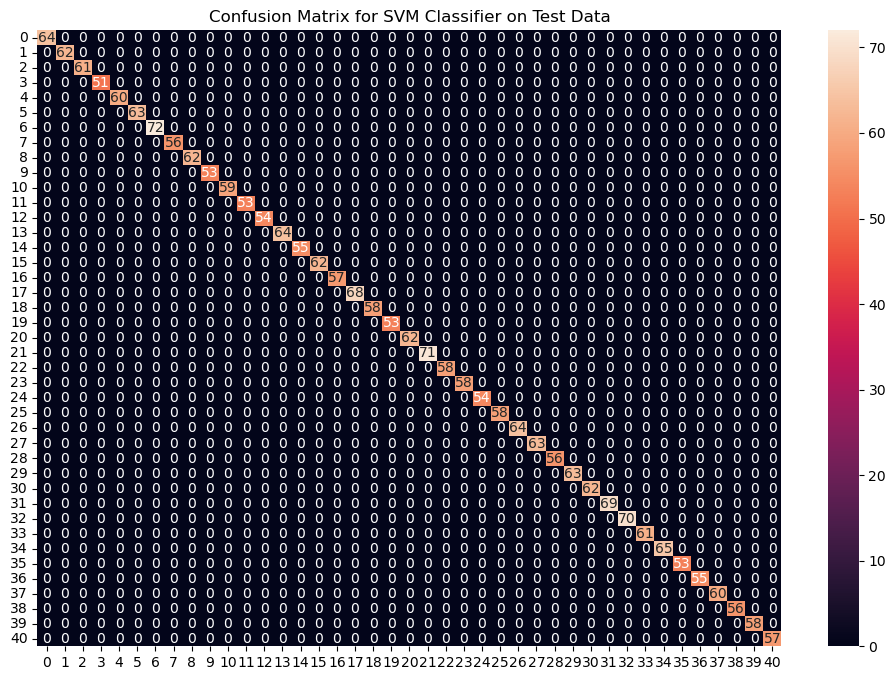

Accuracy on train data by Naive Bayes Classifier: 100.0
Accuracy on test data by Naive Bayes Classifier: 100.0


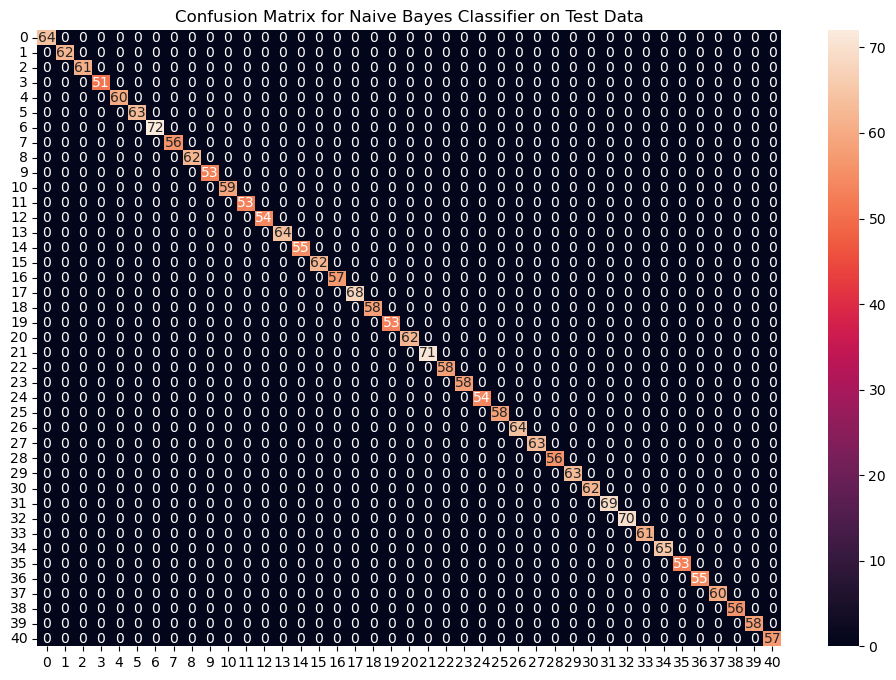

Accuracy on train data by Random Forest Classifier: 100.0
Accuracy on test data by Random Forest Classifier: 100.0


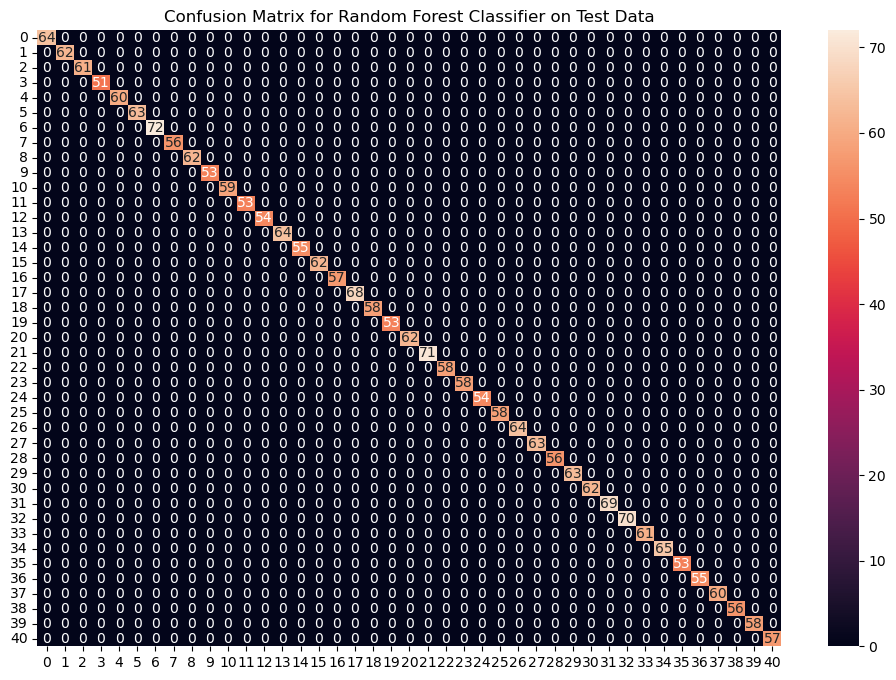

In [19]:
svm_model=SVC()
svm_model.fit(x_train,y_train)
preds=svm_model.predict(x_test)

print(f"Accuracy on train data by SVM Classifier: {accuracy_score(y_train,svm_model.predict(x_train))*100}")

print(f"Accuracy on test data by SVM Classifier: {accuracy_score(y_test,preds)*100}")

cf_matrix=confusion_matrix(y_test,preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix,annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()

nb_model=GaussianNB()
nb_model.fit(x_train,y_train)
preds=nb_model.predict(x_test)
print(f"Accuracy on train data by Naive Bayes Classifier: {accuracy_score(y_train,nb_model.predict(x_train))*100}")
print(f"Accuracy on test data by Naive Bayes Classifier: {accuracy_score(y_test, preds)*100}")

cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()

rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(x_train, y_train)
preds = rf_model.predict(x_test)
print(f"Accuracy on train data by Random Forest Classifier: {accuracy_score(y_train, rf_model.predict(x_train))*100}")
 
print(f"Accuracy on test data by Random Forest Classifier: {accuracy_score(y_test, preds)*100}")
 
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()

C:\Users\prate\AppData\Local\Temp\ipykernel_11512\2255991120.py:16: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  final_preds=[mode([i,j,k])[0][0] for i,j,k in zip(svm_preds,nb_preds,rf_preds)]


Accuracy on Test dataset by the combined model: 100.0


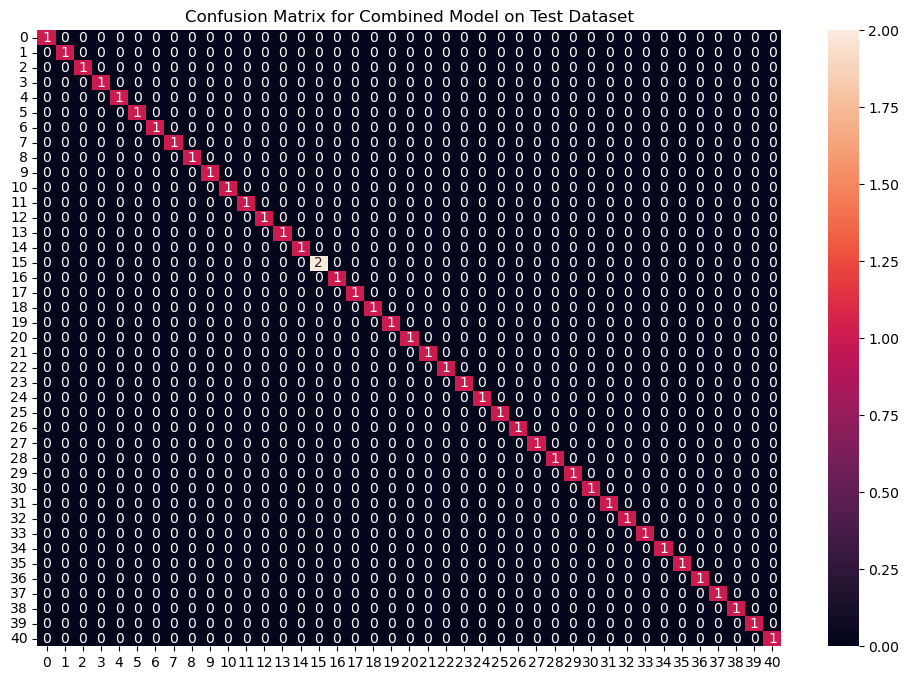

In [20]:
final_svm_model=SVC()
final_nb_model=GaussianNB()
final_rf_model=RandomForestClassifier(random_state=24)
final_svm_model.fit(x,y)
final_nb_model.fit(x,y)
final_rf_model.fit(x,y)

test_data=pd.read_csv("./datasets/Testing.csv").dropna(axis=1)
test_x=test_data.iloc[:,:-1]
test_y=encoder.transform(test_data.iloc[:,-1])

svm_preds=final_svm_model.predict(test_x)
nb_preds=final_nb_model.predict(test_x)
rf_preds=final_rf_model.predict(test_x)

final_preds=[mode([i,j,k])[0][0] for i,j,k in zip(svm_preds,nb_preds,rf_preds)]

print(f"Accuracy on Test dataset by the combined model: {accuracy_score(test_y,final_preds)*100}")

cf_matrix=confusion_matrix(test_y,final_preds)
plt.figure(figsize=(12,8))

sns.heatmap(cf_matrix,annot=True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()

In [21]:
symptoms=x.columns.values

symptom_index={}
for index,value in enumerate(symptoms):
    symptom=" ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom]=index
    
data_dict={
    "symptom_index":symptom_index,
    "prediction_classes": encoder.classes_
}

def predictDisease(symptoms):
    symptoms=symptoms.split(",")
    
    input_data=[0]*len(data_dict["symptom_index"])
    for symptom in symptoms:
        idnex=data_dict["symptom_index"][symptom]
        input_data[index]=1
        
    input_data=np.array(input_data).reshape(1,-1)
    
    rf_prediction=data_dict["prediction_classes"][final_rf_model.predict(input_data)[0]]
    nb_prediction = data_dict["prediction_classes"][final_nb_model.predict(input_data)[0]]
    svm_prediction = data_dict["prediction_classes"][final_svm_model.predict(input_data)[0]]
    
    final_prediction = mode([rf_prediction, nb_prediction, svm_prediction])[0][0]
    predictions = {
        "rf_model_prediction": rf_prediction,
        "naive_bayes_prediction": nb_prediction,
        "svm_model_prediction": svm_prediction,
        "final_prediction":final_prediction
    }
    return predictions

print(predictDisease("Itching,Skin Rash,Nodal Skin Eruptions"))

{'rf_model_prediction': 'Impetigo', 'naive_bayes_prediction': 'Impetigo', 'svm_model_prediction': 'Impetigo', 'final_prediction': 'Impetigo'}


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\prate\AppData\Local\Temp\ipykernel_11512\2569511535.py:27: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid t